### Added 30% of duplicates 

In [1]:
import sys
import os 
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))

import duplicates_utils
import pandas as pd
import ML_algorithms
from sklearn.metrics import classification_report

# Return to previous directory
os.chdir('..')

df = pd.read_csv('dataset/stroke_data.csv')

no_stroke_group = df[df['stroke'] == 0]
stroke_group = df[df['stroke'] == 1]

group_size = 5000

sampled_no_stroke_group = no_stroke_group.sample(n=group_size, random_state=42)
sampled_stroke_group = stroke_group.sample(n=group_size, random_state=42)

df = pd.concat([sampled_no_stroke_group,sampled_stroke_group])
df_original = df.copy()
df_original.dropna(axis=0,inplace=True)
df_original = df_original[df_original['age'] >= 0]


df.dropna(axis=0, inplace=True)
df = df[df['age'] >= 0]

duplicates_utils.drop_negative_age(df)

## Adding duplicates

In [2]:
print('--------------------------------------')
duplicates_utils.print_duplicates_values(df) 

print(f'\nADDING 30% TO FEATURE \n')

df = duplicates_utils.replace_duplicates_values(df, 30)
duplicates_utils.print_duplicates_values(df)

--------------------------------------
Number of rows:  9984
Duplicate Counts:  0
Percentage of Duplicate Values:  0.0

ADDING 30% TO FEATURE 

Number of rows:  9984
Duplicate Counts:  2995
Percentage of Duplicate Values:  29.997996794871796


## Decision Tree

Classification Report on Test Set - original:
              precision    recall  f1-score   support

           0       0.80      0.89      0.84      1541
           1       0.87      0.76      0.81      1455

    accuracy                           0.83      2996
   macro avg       0.83      0.83      0.83      2996
weighted avg       0.83      0.83      0.83      2996

Node Labels:
 Annotation(0.578558, 0.954545, 'avg_glucose_level <= 167.36\nsamples = 6988\nvalue = [3433, 3555]\nclass = 1')


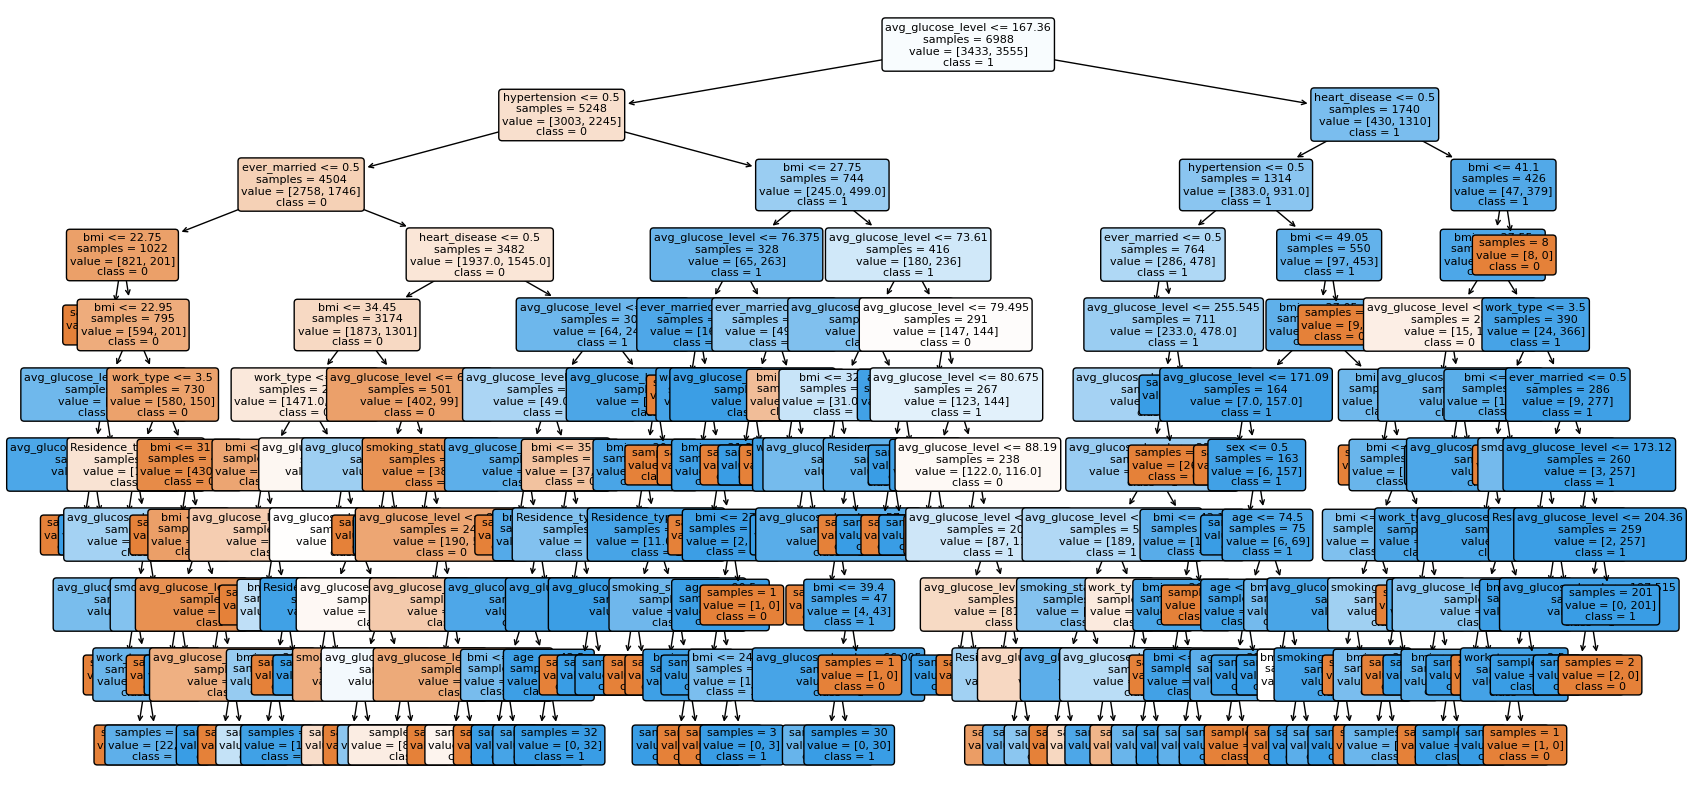

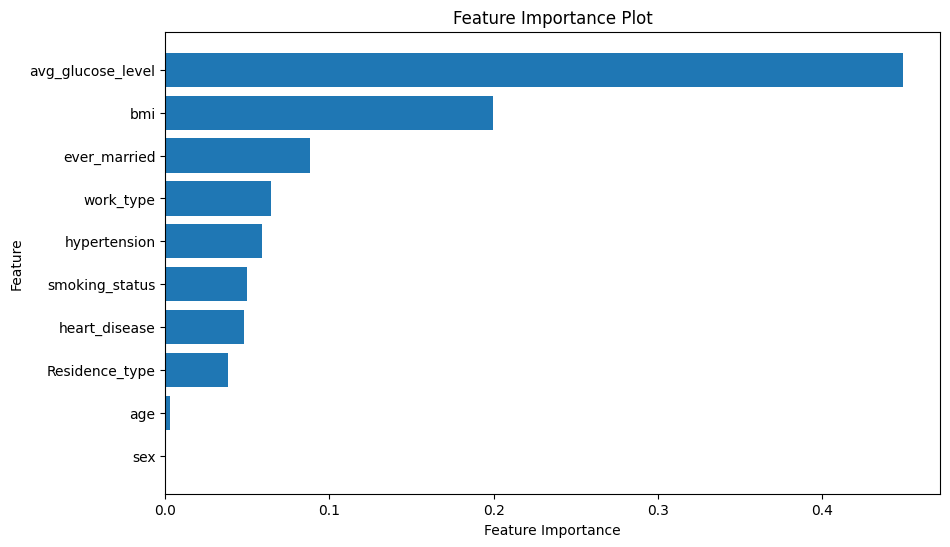

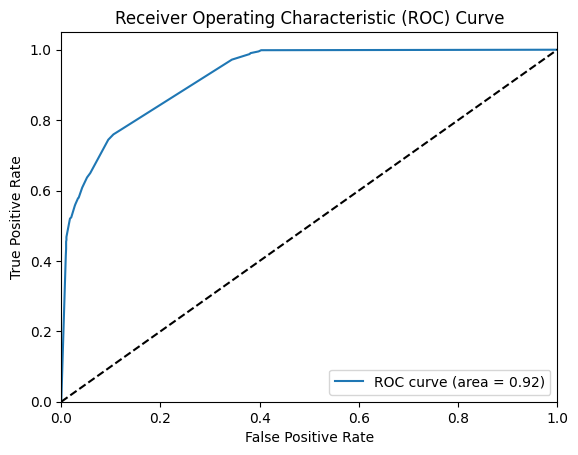

AUC Score: 0.9247230900629082


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Accuracy for each fold: [0.8066666666666666, 0.8033333333333333, 0.82, 0.8066666666666666, 0.7866666666666666, 0.8066666666666666, 0.842809364548495, 0.8494983277591973, 0.7859531772575251, 0.7859531772575251]
Mean accuracy: 0.8094214046822742
95% confidence interval: (0.7934043199190326, 0.8254384894455158)


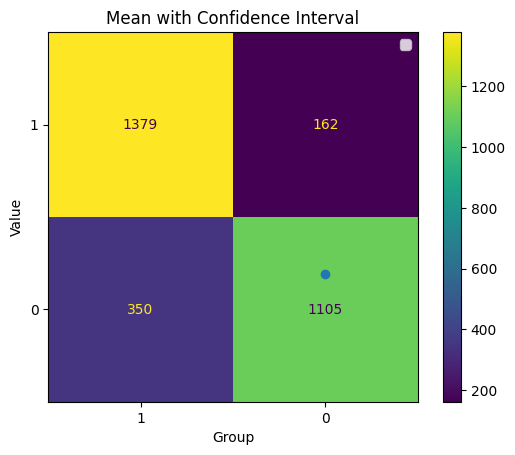

In [3]:
decision_tree = ML_algorithms.model_dt(df, df_original)
ML_algorithms.k_fold_cross_validation_dt(decision_tree, df_original)


## Support Vector Machine

Classification Report on Original Test Set:
              precision    recall  f1-score   support

           0       0.67      0.78      0.72      1541
           1       0.71      0.59      0.65      1455

    accuracy                           0.69      2996
   macro avg       0.69      0.68      0.68      2996
weighted avg       0.69      0.69      0.68      2996



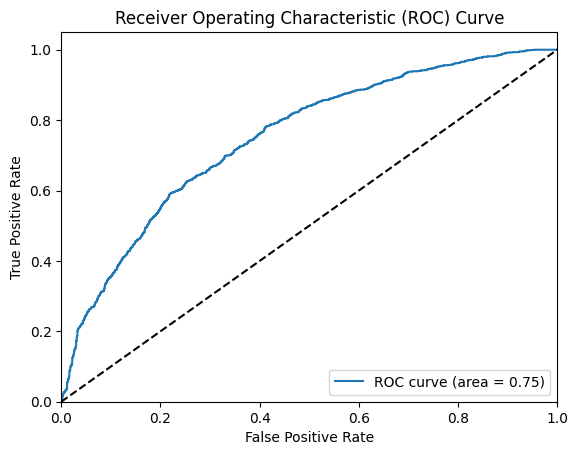

AUC Score: 0.7495115190519835


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Accuracy for each fold: [0.65, 0.6033333333333334, 0.6733333333333333, 0.69, 0.7133333333333334, 0.65, 0.6555183946488294, 0.7190635451505016, 0.6555183946488294, 0.745819397993311]
Mean accuracy: 0.6755919732441472
95% confidence interval: (0.6456228936283741, 0.7055610528599203)


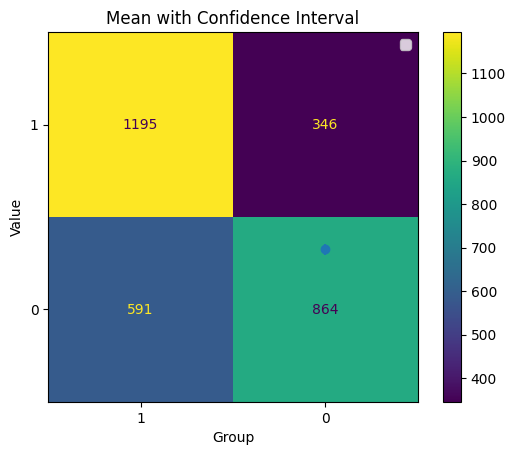

--------------------------------------


In [4]:
svm = ML_algorithms.model_svm(df, df_original)
ML_algorithms.k_fold_cross_validation_dt(svm, df_original)

print('--------------------------------------')